## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
#sample_data = df.sample(200)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
nRows = df.shape[0]
nRows

294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
dfA = df.query('group=="control" & landing_page!="old_page"')
dfB = df.query('group!="control" & landing_page=="old_page"')
df_fixLO = pd.concat([dfA,dfB], axis=0, join='outer')
n_not_matched = df_fixLO.shape[0]
n_not_matched


3893

In [7]:
dfA = df.query('group=="treatment" & landing_page!="new_page"')
dfB = df.query('group!="treatment" & landing_page=="new_page"')
df_fixTN = pd.concat([dfA,dfB], axis=0, join='outer')
n_not_matched = df_fixTN.shape[0]
n_not_matched


3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# get index for corrupt rows
idx = df_fixTN.index
idx.union(df_fixLO.index)

# drop threse rows for df2
df2 = df.copy()
df2.drop(idx, inplace=True)


# reindex df2
df2.reindex()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [10]:
idx.shape

(3893,)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]


0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
#duprow = df2.loc[2893,1]

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop(2893, inplace=True)

# reindex df2
df2.reindex()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.query('converted == 1').count()[0]/df2.shape[0] # Type 1 errors

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
P_A = df2.query("converted == 1 and group == 'control'").count()[0]
P_B = df2.query("group == 'control'").count()[0]
P = P_A/P_B
P

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
P_A = df2.query("converted == 1 and group == 'treatment'").count()[0]
P_B = df2.query("group == 'treatment'").count()[0]
P = P_A/P_B
P

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
P_A = df2.query("landing_page == 'new_page'").count()[0]
P_B = df2.shape[0]
P = P_A/P_B
P

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

- *in general the smaplesize for the analysis is sufficient for a first conclusion*
- *The observed over-all probability for an indvidual to convert is 11.96% - regardless which page the user received*
- *there is almost no difference in this probability when the user received the new or old page (11.88% vs 12.04%)*
- *this small difference is not suffcient to conclude if the new treatment leads to more conversions*

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} \geq 0$$
The Null Hypothes states that on average the new page is not better or even worse than the old page when it comes to the conversion rate.

$$H_1: p_{old} - p_{new} < 0$$
The Alternative Hypothese states that people on the new page are more likely to convert.


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
#treatment_std = df2.query('group == "treatment"').converted.mean() 
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
#control_mean = df2.query('group == "control"').converted.mean()
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('group == "treatment"').converted.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('group == "control"').converted.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

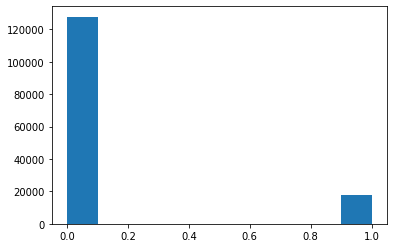

In [24]:
# simulate distribution 
new_page_converted = np.random.binomial(1, p_new, size=n_new)
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

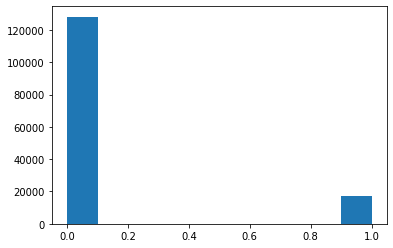

In [25]:
# simulate distribution 
old_page_converted = np.random.binomial(1, p_old, size=n_old)
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
#obs_p_diff = (new_page_converted).mean() - (old_page_converted).mean()
# consider remark from reviewer
obs_p_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()
obs_p_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
# create sampling distribution of difference in average convertions
# overread that we we should use same approach from a to g
#p_diffs = []
#size = df2.shape[0]
#for _ in range(10000):
#    b_samp = df2.sample(size, replace=True)
#    control_mean = b_samp.query('group == "control"').converted.mean()
#    experiment_mean = b_samp.query('group == "treatment"').converted.mean()
#    p_diffs.append(experiment_mean - control_mean)

In [28]:
n_sim = 10000
p_new_sim_1e5 = np.random.binomial(n_new, p_new, n_sim)/n_new
p_old_sim_1e5 = np.random.binomial(n_old, p_old, n_sim)/n_old
p_diffs = p_new_sim_1e5 - p_old_sim_1e5
p_diffs;

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

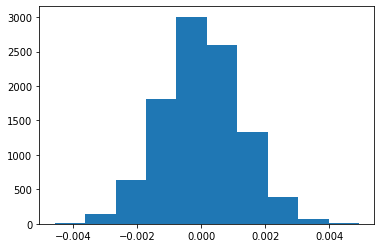

In [29]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#(p_diffs > p_diff_sim).sum()/len(p_diffs)
#(p_diffs > obs_p_diff).mean()
# consider remarks from reviewer
len(p_diffs[p_diffs > obs_p_diff])/len(p_diffs)

0.9008

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We calculated the p-value in part j.
It is the probability of oberserving convertions if our null hypotheses is ture.

With regard to the difference between of new and old pages and the given error threshold of alpha = 0.05, **we fail to reject the null hypotheses**. This means we have evidence that our statistics is likely to have come from the null. On average more the new page is not better or even worse than the old page when it comes to the conversion rate.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].count()
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].count()
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
n_new = df2.query('landing_page == "old_page"')['user_id'].count()
convert_new


17264

In [32]:
n_old

145274

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
zstat, pval = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],value=None,alternative='larger')
zstat, pval


(1.2863207858559254, 0.09916556558876632)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

zstat (float) – test statistic for the z-test
p-value (float) – p-value for the z-test

- the z-score of ~1.3 indicates a low probability of data above the z-score
- the p_value of ~0.1 indicates that we fail to recect the null.

Even when we came to the same conclusion its not really appropiate to say that the findings agree with part j and k.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

- *Logistic Regression should be considered since the group columns are categorical variables*

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# add intercept and ab_page columns
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               8.077e-06
Time:                        20:23:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

- the p-value associated with ab_page is **0.190**, which is not statistically relevant
- the value is different since we performed a **two-tailed test in Part III** and a **one-tailed test in Part II**. This means in order to compare the values can set the p_value in **Part III to 1-0.190=0.81**
- using this p_value the p_values are somewhat comparable.

*Source:* 
https://stats.idre.ucla.edu/other/mult-pkg/faq/pvalue-htm/

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

- *adding additional terms might help to identify which term is the most impactful*
- *adding additional terms might increase the variance, which makes it harder to distinguish independent from dependent terms*

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns.

In [37]:
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# join dataframe with user_ids from df2
df2 = pd.merge(country_df, df2, on = 'user_id')
df2.head()

df2['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [39]:
# dummies variables for countries
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])
df2['intercept'] = 1
df2.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [40]:
df2.groupby('country').mean()

,user_id,converted,intercept,ab_page,CA,UK,US
country,,,,,,,
CA,788640.270639,0.115318,1.0,0.503552,1.0,0.0,0.0
UK,787678.848246,0.120594,1.0,0.498247,0.0,1.0,0.0
US,788075.662148,0.119547,1.0,0.500459,0.0,0.0,1.0


In [41]:
df2.groupby('ab_page').mean()

,user_id,converted,intercept,CA,UK,US
ab_page,,,,,,
0,788164.072594,0.120386,1.0,0.049548,0.250286,0.700167
1,787845.719290,0.118808,1.0,0.050244,0.248476,0.701280


In [42]:
# use USA column as intercept
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               1.521e-05
Time:                        20:24:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

- the p_value of intercept (USA) is 0 and indicates that the the results are statitically relevant
- the correlation coefficent of intercept indicates a pretty reasonable impact regarding the conversion rate 
- the p_values of CA and UK are not statitically relevant



h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
df3 = df2.copy()
df3

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
290579,653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,0,1
290580,878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0
290581,799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0
290582,655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,1,0,0


In [44]:
# combine information of country and ab_page
df3['US_ab_page'] = df3['US'] * df3['ab_page']
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']
df3.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_ab_page,UK_ab_page,CA_ab_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [45]:
# logistic regression on these new columns; drop CA_ab_page
log_mod = sm.Logit(df3['converted'], df3[['intercept','US_ab_page', 'UK_ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Apr 2020   Pseudo R-squ.:               1.082e-05
Time:                        20:24:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
US_ab_page    -0.0144      0.012     -1.155      0.248      -0.039       0.010
UK_ab_page     0.0112      0.018      0.626      0.532      -0.024       0.046
==============================================================================
"""

**Conclusion**
- the p_value of intercept (CA_ab_page) is 0 and indicates that the the results are statitically relevant
- the correlation coefficent of intercept indicates a pretty reasonable impact regarding the conversion rate 
- the p_value of US_ab_page and UK_ab_page are not statitically relevant

<a id='conclusions'></a>
## Conclusion


- **The new page probably will not increase the convertation rate.**
- the new_page also has probably a negative impact on the conversion rate when people are from the USA.
- the new_page has in probably a negative impact on the conversion rate in CA.



In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0